In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import seaborn as sns
from sklearn.model_selection import train_test_split
from ydata_profiling import ProfileReport
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from numpy import arange
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, SelectFromModel, f_classif
from xgboost import XGBClassifier
from sklearn import set_config
from sklearn.decomposition import PCA
from sklearn.inspection import PartialDependenceDisplay
set_config(transform_output="pandas")

In [2]:
ad_df = pd.read_csv('/Users/stojanstojkovic/Downloads/alzheimers_disease_data.csv')
ad_df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid


In [3]:
ad_df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

In [4]:
X = ad_df.drop(columns=['DoctorInCharge']).set_index('PatientID')
y = X.pop('Diagnosis')   

In [9]:
for index, col in enumerate(X.columns):
    print(f"Index {index}: {col}")

Index 0: Age
Index 1: Gender
Index 2: Ethnicity
Index 3: EducationLevel
Index 4: BMI
Index 5: Smoking
Index 6: AlcoholConsumption
Index 7: PhysicalActivity
Index 8: DietQuality
Index 9: SleepQuality
Index 10: FamilyHistoryAlzheimers
Index 11: CardiovascularDisease
Index 12: Diabetes
Index 13: Depression
Index 14: HeadInjury
Index 15: Hypertension
Index 16: SystolicBP
Index 17: DiastolicBP
Index 18: CholesterolTotal
Index 19: CholesterolLDL
Index 20: CholesterolHDL
Index 21: CholesterolTriglycerides
Index 22: MMSE
Index 23: FunctionalAssessment
Index 24: MemoryComplaints
Index 25: BehavioralProblems
Index 26: ADL
Index 27: Confusion
Index 28: Disorientation
Index 29: PersonalityChanges
Index 30: DifficultyCompletingTasks
Index 31: Forgetfulness


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [13]:
cat_cols = ['Ethnicity']
num_cols = [col for col in X.columns if col != 'Ethnicity']

In [15]:
# Use One-Hot Encoding for nominal categories with few unique values or binary categories (if not already in 0/1).
# Don’t use One-Hot Encoding for ordinal features or when the feature already has a numeric representation that conveys order.

cat_pipe = make_pipeline(
    OneHotEncoder(sparse_output=False, handle_unknown='infrequent_if_exist', min_frequency=0.03)
)
num_pipe = make_pipeline('passthrough') 

In [17]:
preprocessor = ColumnTransformer(
    transformers=[
    ('num_pipe', num_pipe, num_cols),
    ('cat_pipe', cat_pipe, cat_cols),
    ]
)

***Class Distribution***

Class Distribution:
 Diagnosis
0    1112
1     607
Name: count, dtype: int64

Class Ratios:
 Diagnosis
0    0.646888
1    0.353112
Name: count, dtype: float64


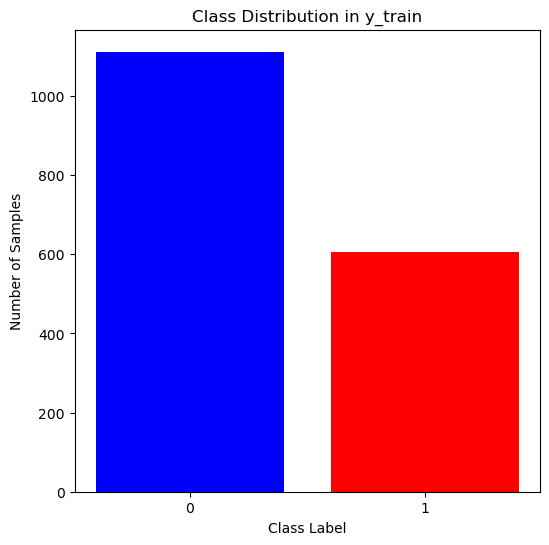

In [20]:
# Check class distribution
class_counts = y_train.value_counts()
class_ratios = class_counts / len(y_train)  # Calculate ratio

# Print the distribution
print("Class Distribution:\n", class_counts)
print("\nClass Ratios:\n", class_ratios)

# Plot the class distribution
plt.figure(figsize=(6, 6))
plt.bar(class_counts.index.astype(str), class_counts.values, color=['blue', 'red'])
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.title("Class Distribution in y_train")
plt.show()

***XGBoost with Imabalanced Data***

In [23]:
xgb_full_pipeline = make_pipeline(preprocessor, 
                                  XGBClassifier(eval_metric='logloss'))

xgb_param_grid = {
    'xgbclassifier__n_estimators': range(120, 161, 10),
    'xgbclassifier__max_depth': range(2, 6, 2),
    'xgbclassifier__learning_rate': [0.01, 0.05, 0.1],
    'xgbclassifier__subsample': [0.6, 0.8],
    'xgbclassifier__colsample_bytree': [0.4, 0.5, 0.6],  
}

xgb_search = GridSearchCV(xgb_full_pipeline,
                          xgb_param_grid,
                          cv=5,
                          verbose=1,
                          n_jobs=-1)
xgb_search.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('passthrough',
                                                                                          'passthrough')]),
                                                                         ['Age',
                                                                          'Gender',
                                                                          'EducationLevel',
                                                                          'BMI',
                                                                          'Smoking',
                                                                          'AlcoholConsumption',
                                                                          'PhysicalActivity',
                                                                          'DietQuality',
                                                                          'SleepQuality',
                                                                          'FamilyHistoryAlzheimers',
                                                                          'CardiovascularDisease',
                                                                          'Diabetes',
                                                                          'Depression',
                                                                          '...
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'xgbclassifier__colsample_bytree': [0.4, 0.5, 0.6],
                         'xgbclassifier__learning_rate': [0.01, 0.05, 0.1],
                         'xgbclassifier__max_depth': range(2, 6, 2),
                         'xgbclassifier__n_estimators': range(120, 161, 10),
                         'xgbclassifier__subsample': [0.6, 0.8]},
             verbose=1)

In [25]:
xgb_search.best_params_
xgb_search.best_score_
print(f"Best Parameters: {xgb_search.best_params_}")
print(f"Best Score: {xgb_search.best_score_:.4f}")

Best Parameters: {'xgbclassifier__colsample_bytree': 0.4, 'xgbclassifier__learning_rate': 0.05, 'xgbclassifier__max_depth': 2, 'xgbclassifier__n_estimators': 140, 'xgbclassifier__subsample': 0.8}
Best Score: 0.9552


In [27]:
y_pred_tree_train = xgb_search.predict(X_train)
y_pred_tree_test = xgb_search.predict(X_test)

train_acc = accuracy_score(y_true = y_train,
            y_pred = y_pred_tree_train
                          )
test_acc = accuracy_score(y_true = y_test,
           y_pred = y_pred_tree_test
                         )
print(f"XGB Training accuracy_score: {train_acc}\nXBG Testing accuracy_score: {test_acc}")

XGB Training accuracy_score: 0.9557882489819662
XBG Testing accuracy_score: 0.9558139534883721


Ranked Feature Importance:
                               Feature  Importance
16        num_pipe__BehavioralProblems        63.0
14      num_pipe__FunctionalAssessment        62.0
13                      num_pipe__MMSE        60.0
15          num_pipe__MemoryComplaints        54.0
17                       num_pipe__ADL        49.0
6               num_pipe__SleepQuality        16.0
11            num_pipe__CholesterolHDL        16.0
9           num_pipe__CholesterolTotal        14.0
2                        num_pipe__BMI        12.0
5                num_pipe__DietQuality        12.0
12  num_pipe__CholesterolTriglycerides        12.0
0                        num_pipe__Age        11.0
3         num_pipe__AlcoholConsumption         8.0
20               cat_pipe__Ethnicity_1         7.0
7                 num_pipe__SystolicBP         7.0
4           num_pipe__PhysicalActivity         5.0
10            num_pipe__CholesterolLDL         5.0
8                num_pipe__DiastolicBP         3.0
1   

/var/folders/ld/05hbwsx5599g2vhnkrxzj3wm0000gn/T/ipykernel_1965/817545573.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


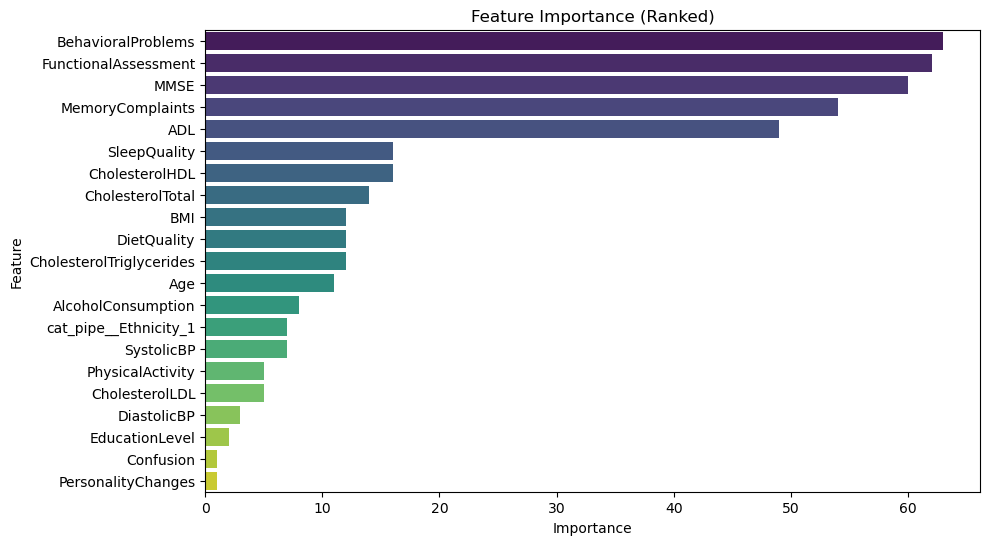

In [29]:
# Get the best estimator from the GridSearchCV
best_model = xgb_search.best_estimator_

# Access the booster (the trained model)
booster = best_model.named_steps['xgbclassifier'].get_booster()

# Get the feature importance using the 'weight' type (you can change to 'gain' or 'cover' if desired)
importance_scores = booster.get_score(importance_type='weight')

# Convert the dictionary to a pandas DataFrame for better readability
importance_df = pd.DataFrame(list(importance_scores.items()), columns=['Feature', 'Importance'])

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted feature importance
print("Ranked Feature Importance:")
print(importance_df)

# Remove 'num_pipe_' prefix from the feature names
importance_df['Feature'] = importance_df['Feature'].str.replace('num_pipe__', '', regex=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance (Ranked)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

/var/folders/ld/05hbwsx5599g2vhnkrxzj3wm0000gn/T/ipykernel_1965/1279025955.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_5_features, palette=gray_shades)


Text(0, 0.5, '')

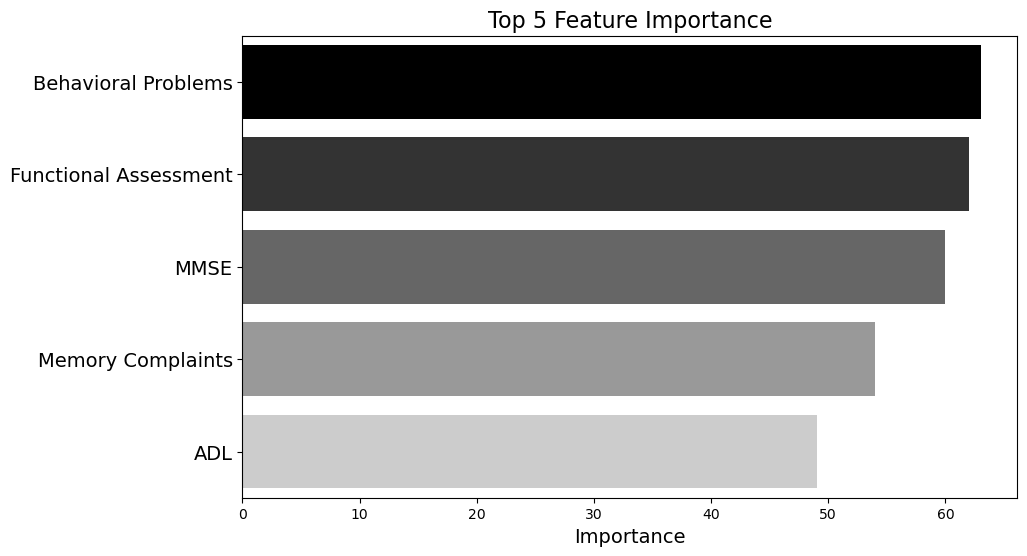

In [99]:
# Select the top 5 features only
top_5_features = importance_df.head(5)

# Plot the feature importance for the top 5 features
plt.figure(figsize=(10, 6))
gray_shades = ["#000000", "#333333", "#666666", "#999999", "#cccccc"]
sns.barplot(x='Importance', y='Feature', data=top_5_features, palette=gray_shades)
# New y-tick labels (your custom feature names)
new_y_labels = ["Behavioral Problems", "Functional Assessment", "MMSE", "Memory Complaints", "ADL"]
# Update y-tick labels
plt.yticks(ticks=np.arange(len(top_5_features)), labels=new_y_labels, fontsize=14)  # Change y-tick labels
plt.title('Top 5 Feature Importance', fontsize=16 )
plt.xlabel('Importance', fontsize=14)
plt.ylabel('')

**Partial Dependences**

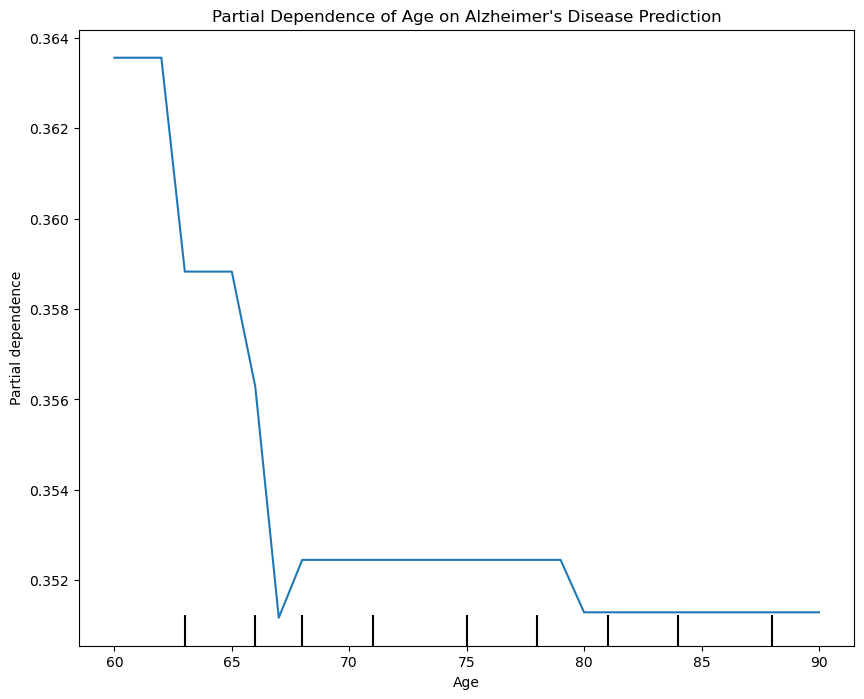

In [33]:
# Assuming "age" is the first feature in your dataset (change index as needed)
age_column_index = 0  # Adjust this index based on the position of "age" in your dataset

# Generate PDP for "age"
fig, ax = plt.subplots(figsize=(10, 8))
PartialDependenceDisplay.from_estimator(xgb_search, X_train, [age_column_index], grid_resolution=50, ax=ax)

plt.title('Partial Dependence of Age on Alzheimer\'s Disease Prediction')
plt.show()

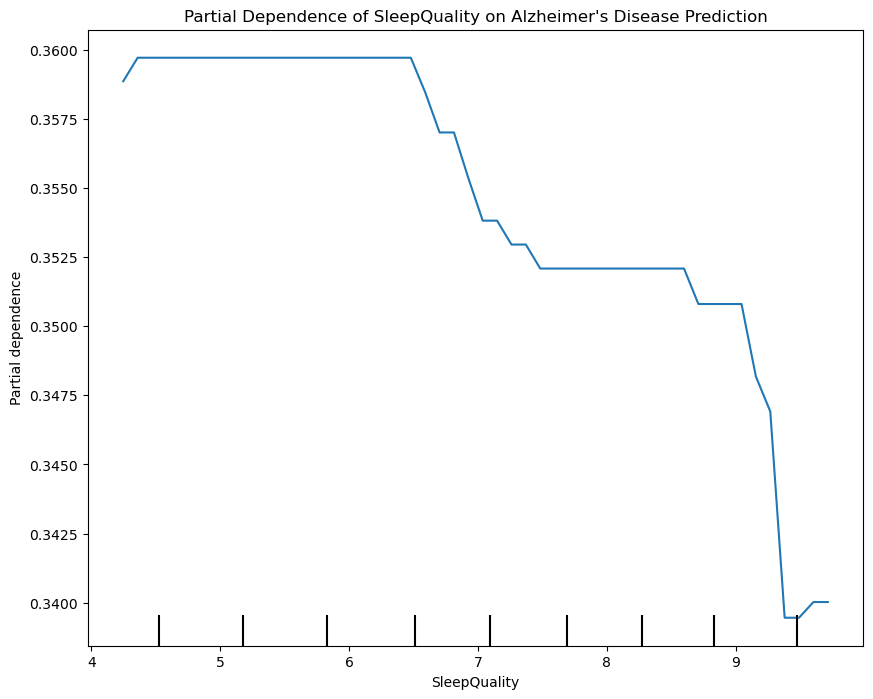

In [40]:
SleepQuality_index = 9  # Adjust this index based on the position of "age" in your dataset

# Generate PDP for "age"
fig, ax = plt.subplots(figsize=(10, 8))
PartialDependenceDisplay.from_estimator(xgb_search, X_train, [SleepQuality_index], grid_resolution=50, ax=ax)

plt.title('Partial Dependence of SleepQuality on Alzheimer\'s Disease Prediction')
plt.show()

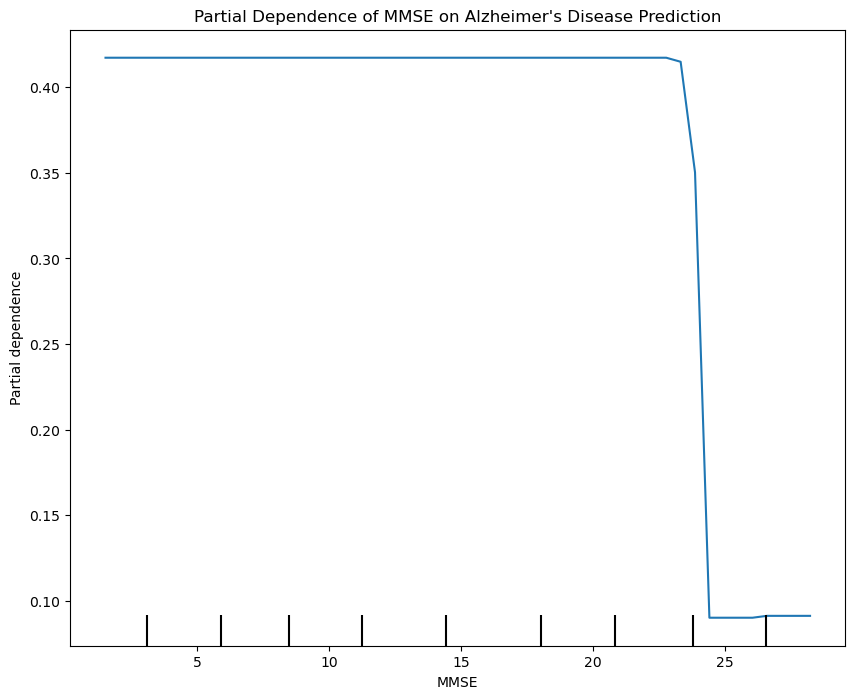

In [42]:
MMSE_index = 22  # Adjust this index based on the position of "age" in your dataset

# Generate PDP for "age"
fig, ax = plt.subplots(figsize=(10, 8))
PartialDependenceDisplay.from_estimator(xgb_search, X_train, [MMSE_index], grid_resolution=50, ax=ax)

plt.title('Partial Dependence of MMSE on Alzheimer\'s Disease Prediction')
plt.show()

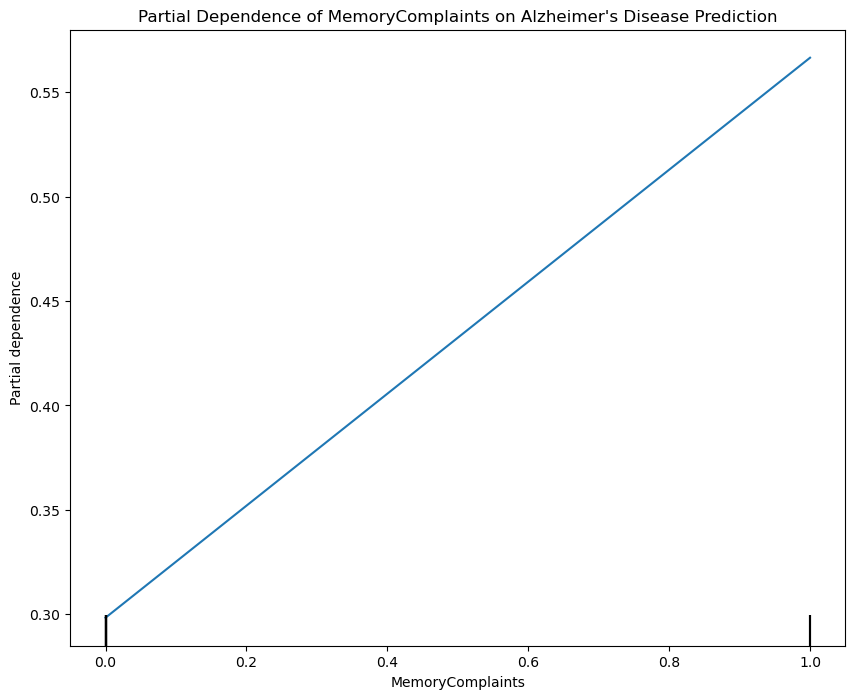

In [45]:
MemoryComplaints_index = 24  # Adjust this index based on the position of "age" in your dataset

# Generate PDP for "age"
fig, ax = plt.subplots(figsize=(10, 8))
PartialDependenceDisplay.from_estimator(xgb_search, X_train, [MemoryComplaints_index], grid_resolution=50, ax=ax)

plt.title('Partial Dependence of MemoryComplaints on Alzheimer\'s Disease Prediction')
plt.show()

In [49]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


<Figure size 1000x600 with 0 Axes>

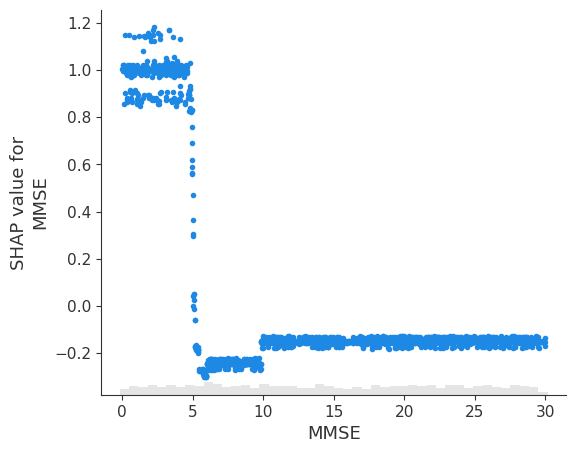

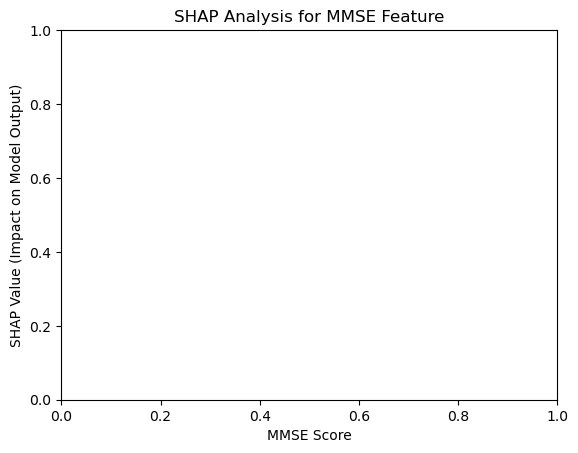

In [51]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Initialize SHAP explainer for the best model
explainer = shap.Explainer(best_model.named_steps["xgbclassifier"], X_train)

# Get SHAP values for the entire dataset
shap_values = explainer(X_train)

# Get the SHAP values specifically for MMSE
mmse_index = X_train.columns.get_loc("MMSE")  # Find the index of MMSE
mmse_shap_values = shap_values[:, mmse_index]  # Extract SHAP values for MMSE

# Scatter plot to visualize how MMSE influences predictions
plt.figure(figsize=(10, 6))
shap.plots.scatter(mmse_shap_values)  # Correct method for SHAP scatter plot
plt.xlabel("MMSE Score")
plt.ylabel("SHAP Value (Impact on Model Output)")
plt.title("SHAP Analysis for MMSE Feature")
plt.show()

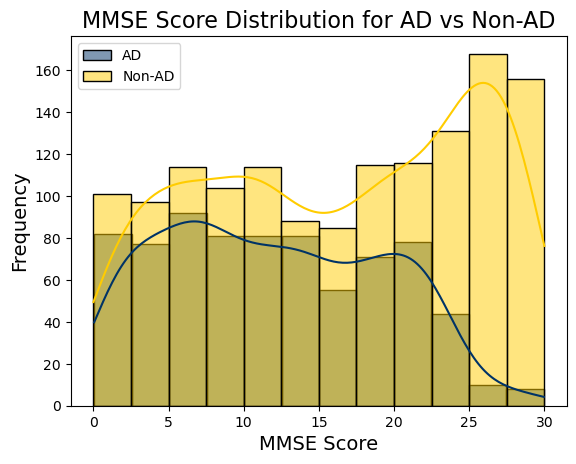

In [115]:
import seaborn as sns

# Plot the distribution of MMSE scores for AD and non-AD patients
sns.histplot(ad_df[ad_df['Diagnosis'] == 1]['MMSE'], color="#003366", label='AD', kde=True)
sns.histplot(ad_df[ad_df['Diagnosis'] == 0]['MMSE'], color="#ffcc00", label='Non-AD', kde=True)
plt.legend()
plt.title('MMSE Score Distribution for AD vs Non-AD', fontsize=16)
plt.xlabel('MMSE Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

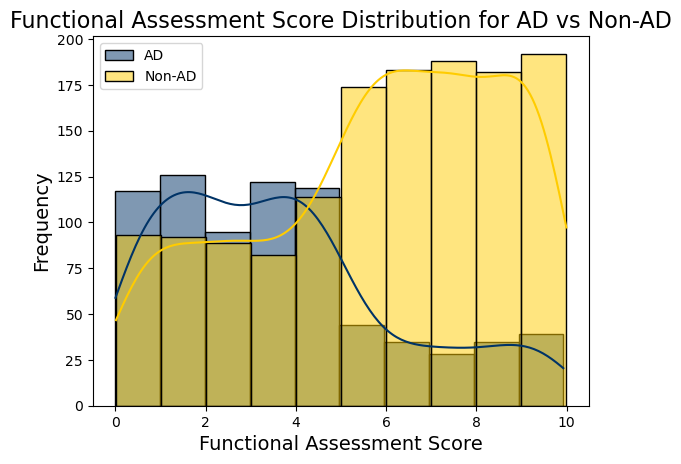

In [119]:
# Plot the distribution of Functional Assessment scores for AD and Non-AD patients
sns.histplot(ad_df[ad_df['Diagnosis'] == 1]['FunctionalAssessment'], 
             color="#003366", label='AD', kde=True, 
             binwidth=1, multiple="dodge")  # Aligning the bins and dodging bars

sns.histplot(ad_df[ad_df['Diagnosis'] == 0]['FunctionalAssessment'], 
             color="#ffcc00", label='Non-AD', kde=True, 
             binwidth=1, multiple="dodge")  # Same binwidth to keep alignment

plt.legend()
plt.title('Functional Assessment Score Distribution for AD vs Non-AD', fontsize=16)
plt.xlabel('Functional Assessment Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

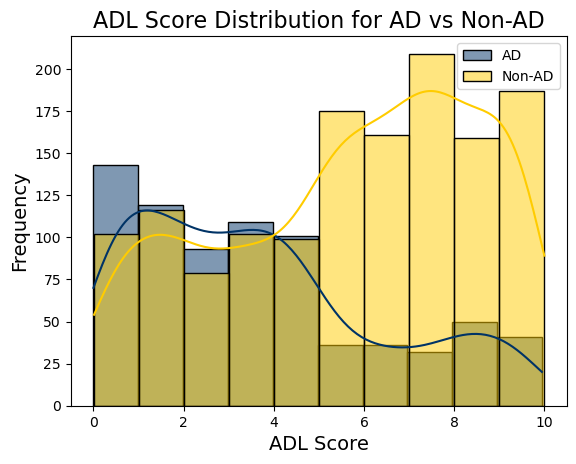

In [123]:
# Plot the distribution of ADL scores for AD and Non-AD patients
sns.histplot(ad_df[ad_df['Diagnosis'] == 1]['ADL'], 
             color="#003366", label='AD', kde=True, 
             binwidth=1, multiple="dodge")  # Aligning the bins and dodging bars

sns.histplot(ad_df[ad_df['Diagnosis'] == 0]['ADL'], 
             color="#ffcc00", label='Non-AD', kde=True, 
             binwidth=1, multiple="dodge")  # Same binwidth to keep alignment

plt.legend()
plt.title('ADL Score Distribution for AD vs Non-AD', fontsize=16)
plt.xlabel('ADL Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

Precision, recall, f-1 score

In [129]:
y_pred = xgb_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       277
           1       0.96      0.92      0.94       153

    accuracy                           0.96       430
   macro avg       0.96      0.95      0.95       430
weighted avg       0.96      0.96      0.96       430



AUC-ROC Score: 0.9520067954979825


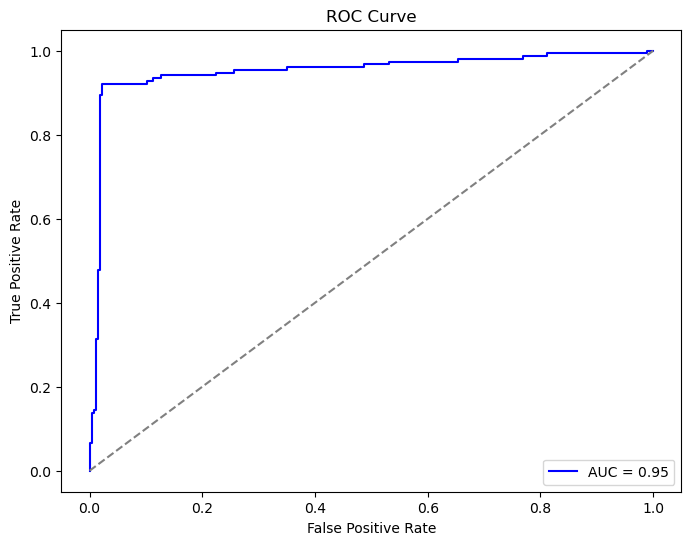

In [131]:
# Get the predicted probabilities (you need probabilities for AUC-ROC)
y_pred_prob = xgb_search.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (AD)

# Compute AUC-ROC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f'AUC-ROC Score: {auc_score}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [157]:
# Save the model
joblib.dump(xgb_search, 'ad_predictor.pkl')

['ad_predictor.pkl']

***XGBoost with Weighting***

In [34]:
xgb_full_pipeline = make_pipeline(preprocessor, 
                                  XGBClassifier(scale_pos_weight=1.86, eval_metric='logloss'))

xgb_param_grid = {
    'xgbclassifier__n_estimators': range(100, 501, 25),
    'xgbclassifier__max_depth': range(2, 10, 2),
    'xgbclassifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'xgbclassifier__subsample': [0.6, 0.8, 1.0]
}

xgb_search = GridSearchCV(xgb_full_pipeline,
                          xgb_param_grid,
                          cv=5,
                          verbose=1,
                          n_jobs=-1)
xgb_search.fit(X_train, y_train)

Fitting 5 folds for each of 816 candidates, totalling 4080 fits


/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('passthrough',
                                                                                          'passthrough')]),
                                                                         ['Age',
                                                                          'Gender',
                                                                          'EducationLevel',
                                                                          'BMI',
                                                                          'Smoking',
                                                                          'AlcoholConsumption',
                                                                          'PhysicalActivity',
                                                                          'DietQuality',
                                                                          'SleepQuality',
                                                                          'FamilyHistoryAlzheimers',
                                                                          'CardiovascularDisease',
                                                                          'Diabetes',
                                                                          'Depression',
                                                                          '...
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'xgbclassifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'xgbclassifier__max_depth': range(2, 10, 2),
                         'xgbclassifier__n_estimators': range(100, 501, 25),
                         'xgbclassifier__subsample': [0.6, 0.8, 1.0]},
             verbose=1)

In [36]:
xgb_search.best_params_
xgb_search.best_score_
print(f"Best Parameters: {xgb_search.best_params_}")
print(f"Best Score: {xgb_search.best_score_:.4f}")

Best Parameters: {'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__max_depth': 6, 'xgbclassifier__n_estimators': 250, 'xgbclassifier__subsample': 0.8}
Best Score: 0.9517


In [38]:
y_pred_tree_train = xgb_search.predict(X_train)
y_pred_tree_test = xgb_search.predict(X_test)

train_acc = accuracy_score(y_true = y_train,
            y_pred = y_pred_tree_train
                          )
test_acc = accuracy_score(y_true = y_test,
           y_pred = y_pred_tree_test
                         )
print(f"XGB Training accuracy_score: {train_acc}\nXBG Testing accuracy_score: {test_acc}")

XGB Training accuracy_score: 0.9691681210005817
XBG Testing accuracy_score: 0.9558139534883721


In [35]:
# Get the best estimator from the GridSearchCV
best_model = xgb_search.best_estimator_

# Access the booster (the trained model)
booster = best_model.named_steps['xgbclassifier'].get_booster()

# Get the feature importance using the 'weight' type (you can change to 'gain' or 'cover' if desired)
importance_scores = booster.get_score(importance_type='weight')

# Convert the dictionary to a pandas DataFrame for better readability
importance_df = pd.DataFrame(list(importance_scores.items()), columns=['Feature', 'Importance'])

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted feature importance
print("Ranked Feature Importance:")
print(importance_df)

Ranked Feature Importance:
                                Feature  Importance
21                       num_pipe__MMSE      1082.0
25                        num_pipe__ADL       982.0
22       num_pipe__FunctionalAssessment       911.0
24         num_pipe__BehavioralProblems       699.0
23           num_pipe__MemoryComplaints       553.0
7                 num_pipe__DietQuality       536.0
19             num_pipe__CholesterolHDL       468.0
6            num_pipe__PhysicalActivity       450.0
17           num_pipe__CholesterolTotal       412.0
0                         num_pipe__Age       407.0
18             num_pipe__CholesterolLDL       373.0
15                 num_pipe__SystolicBP       364.0
20   num_pipe__CholesterolTriglycerides       358.0
3                         num_pipe__BMI       353.0
8                num_pipe__SleepQuality       324.0
5          num_pipe__AlcoholConsumption       231.0
16                num_pipe__DiastolicBP       226.0
32                cat_pipe__Ethnicity

In [36]:
y_pred = xgb_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       277
           1       0.95      0.92      0.94       153

    accuracy                           0.96       430
   macro avg       0.96      0.95      0.95       430
weighted avg       0.96      0.96      0.96       430



***XGBoost with Scaler***

In [43]:
xgb_full_pipeline = make_pipeline(preprocessor, 
                                  StandardScaler(),
                                  XGBClassifier(eval_metric='logloss'))

xgb_param_grid = {
    'standardscaler': [StandardScaler(), RobustScaler(), MinMaxScaler()],
    'xgbclassifier__n_estimators': range(100, 401, 50),
    'xgbclassifier__max_depth': range(2, 10, 2),
    'xgbclassifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'xgbclassifier__subsample': [0.6, 0.8, 1.0]
}

xgb_search = GridSearchCV(xgb_full_pipeline,
                          xgb_param_grid,
                          cv=5,
                          verbose=1,
                          n_jobs=-1)
xgb_search.fit(X_train, y_train)

Fitting 5 folds for each of 1008 candidates, totalling 5040 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('passthrough',
                                                                                          'passthrough')]),
                                                                         ['Age',
                                                                          'Gender',
                                                                          'EducationLevel',
                                                                          'BMI',
                                                                          'Smoking',
                                                                          'AlcoholConsumption',
                                                                          'PhysicalActivity',
                                                                          'DietQuality',
                                                                          'SleepQuality',
                                                                          'FamilyHistoryAlzheimers',
                                                                          'CardiovascularDisease',
                                                                          'Diabetes',
                                                                          'Depression',
                                                                          '...
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'standardscaler': [StandardScaler(), RobustScaler(),
                                            MinMaxScaler()],
                         'xgbclassifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'xgbclassifier__max_depth': range(2, 10, 2),
                         'xgbclassifier__n_estimators': range(100, 401, 50),
                         'xgbclassifier__subsample': [0.6, 0.8, 1.0]},
             verbose=1)

In [45]:
xgb_search.best_params_
xgb_search.best_score_
print(f"Best Parameters: {xgb_search.best_params_}")
print(f"Best Score: {xgb_search.best_score_:.4f}")

Best Parameters: {'standardscaler': StandardScaler(), 'xgbclassifier__learning_rate': 0.05, 'xgbclassifier__max_depth': 2, 'xgbclassifier__n_estimators': 150, 'xgbclassifier__subsample': 0.6}
Best Score: 0.9517


In [47]:
y_pred_tree_train = xgb_search.predict(X_train)
y_pred_tree_test = xgb_search.predict(X_test)

train_acc = accuracy_score(y_true = y_train,
            y_pred = y_pred_tree_train
                          )
test_acc = accuracy_score(y_true = y_test,
           y_pred = y_pred_tree_test
                         )
print(f"XGB Training accuracy_score: {train_acc}\nXBG Testing accuracy_score: {test_acc}")

XGB Training accuracy_score: 0.9557882489819662
XBG Testing accuracy_score: 0.9558139534883721


In [49]:
# Get the best estimator from the GridSearchCV
best_model = xgb_search.best_estimator_

# Access the booster (the trained model)
booster = best_model.named_steps['xgbclassifier'].get_booster()

# Get the feature importance using the 'weight' type (you can change to 'gain' or 'cover' if desired)
importance_scores = booster.get_score(importance_type='weight')

# Convert the dictionary to a pandas DataFrame for better readability
importance_df = pd.DataFrame(list(importance_scores.items()), columns=['Feature', 'Importance'])

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted feature importance
print("Ranked Feature Importance:")
print(importance_df)

Ranked Feature Importance:
                               Feature  Importance
12                      num_pipe__MMSE        89.0
13      num_pipe__FunctionalAssessment        83.0
14          num_pipe__MemoryComplaints        79.0
16                       num_pipe__ADL        76.0
15        num_pipe__BehavioralProblems        66.0
0                        num_pipe__Age         8.0
10            num_pipe__CholesterolHDL         7.0
4                num_pipe__DietQuality         6.0
5               num_pipe__SleepQuality         5.0
8           num_pipe__CholesterolTotal         5.0
1                        num_pipe__BMI         5.0
11  num_pipe__CholesterolTriglycerides         5.0
6                 num_pipe__SystolicBP         4.0
3           num_pipe__PhysicalActivity         3.0
7                num_pipe__DiastolicBP         3.0
9             num_pipe__CholesterolLDL         2.0
2         num_pipe__AlcoholConsumption         2.0
17               cat_pipe__Ethnicity_1         2.0
